# Yolo11 Demo

In [6]:
from ultralytics import YOLO
import cv2
import numpy as np
from PIL import Image
import requests
from io import BytesIO

In [7]:
model = YOLO("yolo11n-pose.yaml")
model = YOLO("yolo11n-pose.pt")

results = model("https://ultralytics.com/images/bus.jpg")


Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /root/codebase/learning-post-estimation/bus.jpg: 640x480 4 persons, 80.6ms
Speed: 7.0ms preprocess, 80.6ms inference, 8.4ms postprocess per image at shape (1, 3, 640, 480)


In [9]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: ultralytics.engine.results.Keypoints object
 masks: None
 names: {0: 'person'}
 obb: None
 orig_img: array([[[119, 146, 172],
         [121, 148, 174],
         [122, 152, 177],
         ...,
         [161, 171, 188],
         [160, 170, 187],
         [160, 170, 187]],
 
        [[120, 147, 173],
         [122, 149, 175],
         [123, 153, 178],
         ...,
         [161, 171, 188],
         [160, 170, 187],
         [160, 170, 187]],
 
        [[123, 150, 176],
         [124, 151, 177],
         [125, 155, 180],
         ...,
         [161, 171, 188],
         [160, 170, 187],
         [160, 170, 187]],
 
        ...,
 
        [[183, 182, 186],
         [179, 178, 182],
         [180, 179, 183],
         ...,
         [121, 111, 117],
         [113, 103, 109],
         [115, 105, 111]],
 
        [[165, 164, 168],
         [173, 172, 176],
         [187, 186,


0: 640x480 4 persons, 103.3ms
Speed: 8.8ms preprocess, 103.3ms inference, 8.8ms postprocess per image at shape (1, 3, 640, 480)


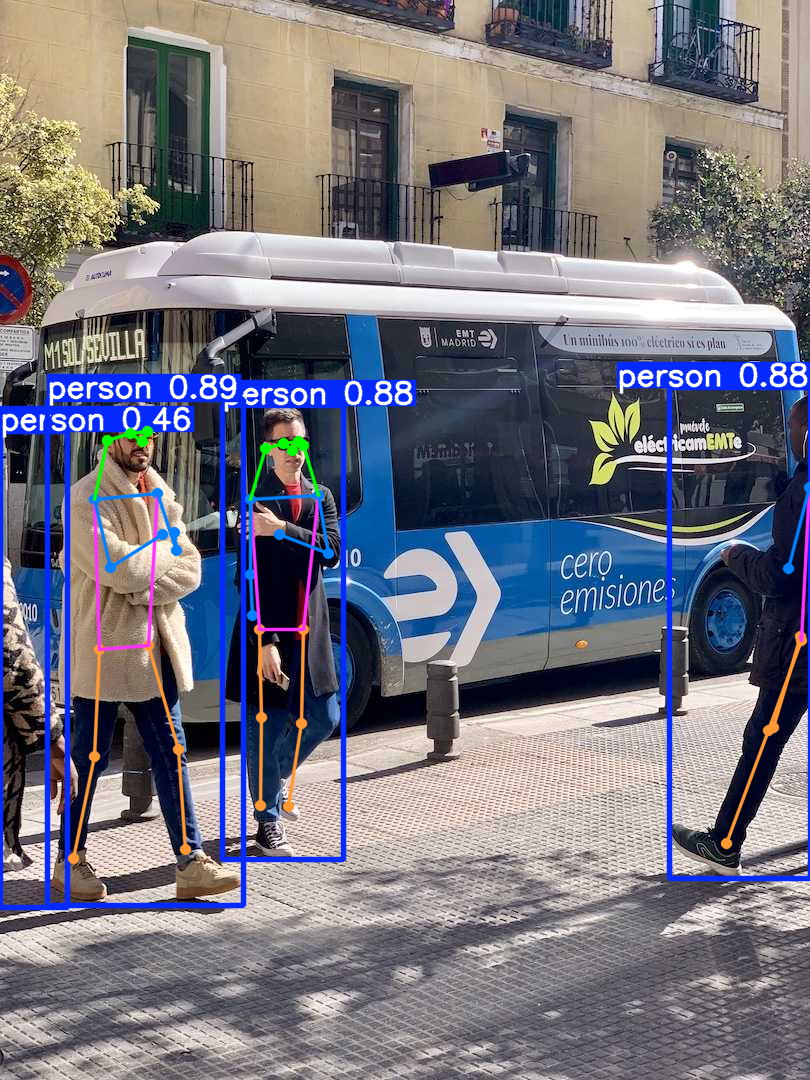

In [8]:
def load_image_from_url(url):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    return cv2.cvtColor(np.array(img), cv2.COLOR_RGB2BGR)

# Load and process the image
image_url = "https://ultralytics.com/images/bus.jpg"
image = load_image_from_url(image_url)

# Run inference
results = model(image)

# Visualize the results
for result in results:
    # Get the plotted image with detections
    plotted_image = result.plot()
    
    # Convert from BGR to RGB for display
    plotted_image_rgb = cv2.cvtColor(plotted_image, cv2.COLOR_BGR2RGB)
    
    # Display using PIL
    Image.fromarray(plotted_image_rgb).show()
    
    # Alternatively, save the image
    cv2.imwrite('output_detection.jpg', plotted_image)  